In [1]:
# gọi thư viện, data 
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
path = "C:/Users/Phung Ha/Desktop/Data_final_file/WT_Data_after_clustering(FCM).csv"
df = pd.read_csv(path)

In [2]:
min_power = np.array(df[['Power']].min())
max_power = np.array(df[['Power']].max())
min_speed = np.array(df[['Speed']].min())
max_speed = np.array(df[['Speed']].max())
df['Power'] = (df['Power']-min_power)/(max_power-min_power)
df['Speed'] = (df['Speed']-min_speed)/(max_speed-min_speed)

In [3]:
df.insert(4,"Month",df['Date'].str[5:7],True)
df['Month']=df['Month'].apply(pd.to_numeric)

In [4]:
X_try = []
y_try = []
for i,v in enumerate (df['Month']):
    if v ==1  and ((df['Date'].str[8:10].iloc[i]=='01') or (df['Date'].str[8:10].iloc[i]=='02') or (df['Date'].str[8:10].iloc[i]=='03')):
        X_try.append(df['Speed'].iloc[i])
    else:
        pass

for i,v in enumerate (df['Month']):
    if v ==1  and ((df['Date'].str[8:10].iloc[i]=='01') or (df['Date'].str[8:10].iloc[i]=='02') or (df['Date'].str[8:10].iloc[i]=='03')):
        y_try.append(df['Cluster'].iloc[i])
    else:
        pass
X_test = np.array(X_try).reshape(-1,1)
y_test = np.array(y_try).reshape(-1,1)

cc=[]
for i,v in enumerate (df['Month']):
    if v ==1  and ((df['Date'].str[8:10].iloc[i]=='01') or (df['Date'].str[8:10].iloc[i]=='02') or (df['Date'].str[8:10].iloc[i]=='03')):
        cc.append(df['Power'].iloc[i])
    else:
        pass
y_test_power = np.array(cc).reshape(-1,1)

In [5]:
for i,v in enumerate(df['Month']):
    if v == 1:
        df['Month'].iloc[i]=np.nan
    else:
        pass
df = df.dropna()
X_train = np.array(df['Speed']).reshape(-1,1)
y_train = np.array(df['Cluster']).reshape(-1,1)

c:\Users\Phung Ha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [6]:
#tính Euclidean distance sau đó chọn n_neighbor = dis +- 1
import math
math.sqrt(len(y_test))
classifier = KNeighborsClassifier(n_neighbors=36,p=2,metric='euclidean')
classifier.fit(X_train,y_train)

c:\Users\Phung Ha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=36)

In [7]:
#tìm pred và xuất confusion matrix
y_pred_cluster =  classifier.predict(X_test)
cm= confusion_matrix(y_test,y_pred_cluster)
print("Accuaracy: ", accuracy_score(y_test,y_pred_cluster))

from sklearn.metrics import classification_report
print("\n", classification_report(y_test,y_pred_cluster))
print("Confusion Matrix: \n",cm)

Accuaracy:  0.9104477611940298

               precision    recall  f1-score   support

         0.0       0.89      0.80      0.84        10
         1.0       0.50      1.00      0.67         3
         2.0       1.00      1.00      1.00        16
         3.0       1.00      1.00      1.00        27
         4.0       0.78      0.64      0.70        11

    accuracy                           0.91        67
   macro avg       0.83      0.89      0.84        67
weighted avg       0.92      0.91      0.91        67

Confusion Matrix: 
 [[ 8  0  0  0  2]
 [ 0  3  0  0  0]
 [ 0  0 16  0  0]
 [ 0  0  0 27  0]
 [ 1  3  0  0  7]]


In [8]:
path_C1 = "C:/Users/Phung Ha/Desktop/Data_final_file/Cluster 1.csv"
path_C2 = "C:/Users/Phung Ha/Desktop/Data_final_file/Cluster 2.csv"
path_C3 = "C:/Users/Phung Ha/Desktop/Data_final_file/Cluster 3.csv"
path_C4 = "C:/Users/Phung Ha/Desktop/Data_final_file/Cluster 4.csv"
path_C5 = "C:/Users/Phung Ha/Desktop/Data_final_file/Cluster 5.csv"
model1 = pd.read_csv(path_C1)
model2 = pd.read_csv(path_C2)
model3 = pd.read_csv(path_C3)
model4 = pd.read_csv(path_C4)
model5 = pd.read_csv(path_C5)

In [9]:
def train_test_FNN(model):
    model.insert(4,"Month",model1['Date'].str[5:7],True)
    model['Month'] = model['Month'].apply(pd.to_numeric)
    model['Power'] = (model['Power']-min_power)/(max_power-min_power)
    model['Speed'] = (model['Speed']-min_speed)/(max_speed-min_speed)
    for i,v in enumerate(model['Month']):
        if v == 1:
            model['Month'].iloc[i]=np.nan
        else:
            pass
    model = model.dropna()
    X_train = np.array(model['Speed']).reshape(-1,1)
    y_train = np.array(model['Power']).reshape(-1,1)
    return X_train, y_train

def add_error(percent):
    a = np.random.normal(0,percent/3.5,size = len(X_test))
    X_test_new = list(map(lambda x,y: (x*y+y), a, X_test))
    return X_test_new

def df_predict(percent):
    cl=[]
    new_df1 = pd.DataFrame(X_test, columns = ['Real_Value'])
    new_df2 = pd.DataFrame(np.array(add_error(percent)).reshape(-1,1), columns = ['Add_Error'])
    new_df3 = pd.DataFrame(y_test_power, columns = ['Power'])
    new_df4 = pd.DataFrame(y_pred_cluster, columns = ['Classifier'])
    new_df5 = pd.DataFrame(cl,columns = ['Power_Predict'])
    final_df = pd.concat([new_df1,new_df2,new_df3,new_df4,new_df5],axis=1)
    return final_df

In [10]:
X_train_1, y_train_1 = train_test_FNN(model1)
X_train_2, y_train_2 = train_test_FNN(model2)
X_train_3, y_train_3 = train_test_FNN(model3)
X_train_4, y_train_4 = train_test_FNN(model4)
X_train_5, y_train_5 = train_test_FNN(model5)

c:\Users\Phung Ha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


MODEL 1 (CLUSTER 2)

In [11]:
model1_FNN = Sequential(name="Model1-with-One-Input") # Model
model1_FNN.add(Input(shape=(1,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model1_FNN.add(Dense(8, activation='softplus', name='Hidden-Layer-First')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model1_FNN.add(Dense(8, activation='softplus', name='Hidden-Layer-Sercond')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model1_FNN.add(Dense(1, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))

model1_FNN.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
                    loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
                    metrics=['Accuracy', 'Precision', 'Recall'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
                    loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
                    weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
                    run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
                    steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
                    )

model1_FNN.fit(X_train_1, # input data
                    y_train_1, # target data
                    batch_size=8, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                    epochs=50, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                    verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
                    callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
                    validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
                    #validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                    shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
                    class_weight={0 : 0.3, 1 : 0.7}, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
                    sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
                    initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
                    steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
                    validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
                    validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
                    validation_freq=3, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
                    max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
                    workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
                    use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
                    )

Epoch 1/50
345/345 [==============================] - 1s 2ms/step - loss: 0.0101 - Accuracy: 3.6298e-04 - precision: 1.0000 - recall: 0.0025
Epoch 2/50
345/345 [==============================] - 0s 1ms/step - loss: 4.8329e-04 - Accuracy: 3.6298e-04 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/50
345/345 [==============================] - 1s 3ms/step - loss: 3.8382e-04 - Accuracy: 3.6298e-04 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0011 - val_Accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
345/345 [==============================] - 1s 2ms/step - loss: 3.7559e-04 - Accuracy: 3.6298e-04 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/50
345/345 [==============================] - 1s 1ms/step - loss: 3.7188e-04 - Accuracy: 3.6298e-04 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/50
345/345 [==============================] - 1s 2ms/step - loss: 3.6777e-04 - Accuracy: 3.6298e-04 - precision: 0.0000e+00 - recall: 0.0000

MODEL 2 (CLUSTER 1)

In [12]:
model2_FNN = Sequential(name="Model2-with-One-Input") # Model
model2_FNN.add(Input(shape=(1,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model2_FNN.add(Dense(8, activation='softplus', name='Hidden-Layer-First')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model2_FNN.add(Dense(8, activation='softplus', name='Hidden-Layer-Sercond')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model2_FNN.add(Dense(1, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))

model2_FNN.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
                    loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
                    metrics=['Accuracy', 'Precision', 'Recall'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
                    loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
                    weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
                    run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
                    steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
                    )

model2_FNN.fit(X_train_2, # input data
                    y_train_2, # target data
                    batch_size=6, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                    epochs=100, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                    verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
                    callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
                    validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
                    #validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                    shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
                    class_weight={0 : 0.3, 1 : 0.7}, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
                    sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
                    initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
                    steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
                    validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
                    validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
                    validation_freq=3, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
                    max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
                    workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
                    use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
                    )

Epoch 1/100
92/92 [==============================] - 1s 1ms/step - loss: 0.0035 - Accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/100
92/92 [==============================] - 0s 1ms/step - loss: 2.3889e-04 - Accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/100
92/92 [==============================] - 0s 5ms/step - loss: 2.3335e-04 - Accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 8.3997e-04 - val_Accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
92/92 [==============================] - 0s 1ms/step - loss: 2.3385e-04 - Accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/100
92/92 [==============================] - 0s 1ms/step - loss: 2.3355e-04 - Accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/100
92/92 [==============================] - 0s 2ms/step - loss: 2.3297e-04 - Accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 

MODEL 3 (CLUSTER 4)

In [13]:
model3_FNN = Sequential(name="Model3-with-One-Input") # Model
model3_FNN.add(Input(shape=(1,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model3_FNN.add(Dense(20, activation='softplus', name='Hidden-Layer-First')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model3_FNN.add(Dense(20, activation='softplus', name='Hidden-Layer-Sercond')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model3_FNN.add(Dense(1, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))

model3_FNN.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
                    loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
                    metrics=['Accuracy', 'Precision', 'Recall'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
                    loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
                    weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
                    run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
                    steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
                    )

model3_FNN.fit(X_train_3, # input data
                    y_train_3, # target data
                    batch_size=8, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                    epochs=100, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                    verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
                    callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
                    validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
                    #validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                    shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
                    class_weight={0 : 0.3, 1 : 0.7}, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
                    sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
                    initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
                    steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
                    validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
                    validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
                    validation_freq=3, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
                    max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
                    workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
                    use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
                    )

Epoch 1/100
64/64 [==============================] - 1s 1ms/step - loss: 0.0024 - Accuracy: 0.0000e+00 - precision: 1.0000 - recall: 0.0550
Epoch 2/100
64/64 [==============================] - 0s 1ms/step - loss: 8.5680e-04 - Accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/100
64/64 [==============================] - 1s 8ms/step - loss: 8.6793e-04 - Accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0030 - val_Accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
64/64 [==============================] - 0s 2ms/step - loss: 8.5974e-04 - Accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/100
64/64 [==============================] - 0s 2ms/step - loss: 8.6459e-04 - Accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/100
64/64 [==============================] - 0s 4ms/step - loss: 8.8050e-04 - Accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 -

MODEL 4 (CLUSTER 0)

In [14]:
model4_FNN = Sequential(name="Model4-with-One-Input") # Model
model4_FNN.add(Input(shape=(1,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model4_FNN.add(Dense(18, activation='softplus', name='Hidden-Layer-First')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model4_FNN.add(Dense(18, activation='softplus', name='Hidden-Layer-Sercond')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model4_FNN.add(Dense(1, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))

model4_FNN.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
                    loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
                    metrics=['Accuracy', 'Precision', 'Recall'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
                    loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
                    weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
                    run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
                    steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
                    )

model4_FNN.fit(X_train_4, # input data
                    y_train_4, # target data
                    batch_size=8, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                    epochs=100, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                    verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
                    callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
                    validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
                    #validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                    shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
                    class_weight={0 : 0.3, 1 : 0.7}, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
                    sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
                    initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
                    steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
                    validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
                    validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
                    validation_freq=3, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
                    max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
                    workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
                    use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
                    )

Epoch 1/100
60/60 [==============================] - 1s 1ms/step - loss: 0.0027 - Accuracy: 0.0000e+00 - precision: 1.0000 - recall: 1.0000
Epoch 2/100
60/60 [==============================] - 0s 1ms/step - loss: 0.0025 - Accuracy: 0.0000e+00 - precision: 1.0000 - recall: 1.0000
Epoch 3/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0025 - Accuracy: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0094 - val_Accuracy: 0.0000e+00 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0025 - Accuracy: 0.0000e+00 - precision: 1.0000 - recall: 1.0000
Epoch 5/100
60/60 [==============================] - 0s 1ms/step - loss: 0.0025 - Accuracy: 0.0000e+00 - precision: 1.0000 - recall: 1.0000
Epoch 6/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0025 - Accuracy: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0099 - val_Accuracy: 0.0000e+00 - val_precision: 1.0000

MODEL 5 (CLUSTER 3)

In [15]:
model5_FNN = Sequential(name="Model5-with-One-Input") # Model
model5_FNN.add(Input(shape=(1,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model5_FNN.add(Dense(15, activation='softplus', name='Hidden-Layer-First')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model5_FNN.add(Dense(15, activation='softplus', name='Hidden-Layer-Sercond')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model5_FNN.add(Dense(1, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))

model5_FNN.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
                    loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
                    metrics=['Accuracy', 'Precision', 'Recall'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
                    loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
                    weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
                    run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
                    steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
                    )

model5_FNN.fit(X_train_5, # input data
                    y_train_5, # target data
                    batch_size=8, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                    epochs=100, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                    verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
                    callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
                    validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
                    #validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                    shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
                    class_weight={0 : 0.3, 1 : 0.7}, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
                    sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
                    initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
                    steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
                    validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
                    validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
                    validation_freq=3, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
                    max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
                    workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
                    use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
                    )

Epoch 1/100
190/190 [==============================] - 1s 2ms/step - loss: 0.0511 - Accuracy: 6.5789e-04 - precision: 1.0000 - recall: 0.6914 
Epoch 2/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0021 - Accuracy: 6.5789e-04 - precision: 1.0000 - recall: 1.0000
Epoch 3/100
190/190 [==============================] - 1s 3ms/step - loss: 0.0017 - Accuracy: 6.5789e-04 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0041 - val_Accuracy: 0.0000e+00 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/100
190/190 [==============================] - 0s 1ms/step - loss: 0.0017 - Accuracy: 6.5789e-04 - precision: 1.0000 - recall: 1.0000
Epoch 5/100
190/190 [==============================] - 0s 3ms/step - loss: 0.0017 - Accuracy: 6.5789e-04 - precision: 1.0000 - recall: 1.0000
Epoch 6/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0017 - Accuracy: 6.5789e-04 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0039 - val_Accuracy: 0.0000e+00 - val_prec

In [16]:
b = y_test_power
b_denor = b*(max_power-min_power)+min_power

In [17]:
def final_step(percent):
    new_df_model = df_predict(percent)
    new_df_model['Power_Predict']=pd.to_numeric(new_df_model['Power_Predict'], errors = 'coerce')
    y_pred_model1 = pd.DataFrame(model1_FNN.predict((new_df_model.Add_Error).loc[new_df_model.Classifier==2]))
    y_pred_model2 = pd.DataFrame(model2_FNN.predict((new_df_model.Add_Error).loc[new_df_model.Classifier==1]))
    y_pred_model3 = pd.DataFrame(model3_FNN.predict((new_df_model.Add_Error).loc[new_df_model.Classifier==4]))
    y_pred_model4 = pd.DataFrame(model4_FNN.predict((new_df_model.Add_Error).loc[new_df_model.Classifier==0]))
    y_pred_model5 = pd.DataFrame(model5_FNN.predict((new_df_model.Add_Error).loc[new_df_model.Classifier==3]))
    i1,i2,i3,i4,i5 = 0,0,0,0,0
    for i,v in enumerate(new_df_model['Classifier']):
        if v==0:
            new_df_model.Power_Predict.iloc[i]=y_pred_model4.iloc[i1].values
            i1=i1+1
        if v==1:
            new_df_model.Power_Predict.iloc[i]=y_pred_model2.iloc[i2].values
            i2=i2+1
        if v==2:
            new_df_model.Power_Predict.iloc[i]=y_pred_model1.iloc[i3].values
            i3=i3+1
        if v==3:
            new_df_model.Power_Predict.iloc[i]=y_pred_model5.iloc[i4].values
            i4=i4+1
        if v==4:
            new_df_model.Power_Predict.iloc[i]=y_pred_model3.iloc[i5].values
            i5=i5+1
        else:
            pass
    a = np.array(new_df_model.Power_Predict).reshape(-1,1)
    a_denor = a*(max_power-min_power)+min_power
    MRE = abs(a_denor-b_denor)/max_power
    MRE_final = (MRE.sum()/len(MRE))*100
    print('MRE at ',percent*100,'is ',MRE_final)
    return a_denor

In [23]:
y_pred_denor_10 = final_step(0.1)
y_pred_denor_20 = final_step(0.2)
y_pred_denor_30 = final_step(0.3)
y_pred_denor_40 = final_step(0.4)
y_pred_denor_50 = final_step(0.5)

1/1 [==============================] - 0s 29ms/step
MRE at  10.0 is  2.8803241861612636
1/1 [==============================] - 0s 19ms/step
MRE at  20.0 is  3.7461493441056306
1/1 [==============================] - 0s 24ms/step
MRE at  30.0 is  4.591103337115152
1/1 [==============================] - 0s 22ms/step
MRE at  40.0 is  6.49857817466514
1/1 [==============================] - 0s 29ms/step
MRE at  50.0 is  6.717376021824821


In [24]:
len(b_denor)

67

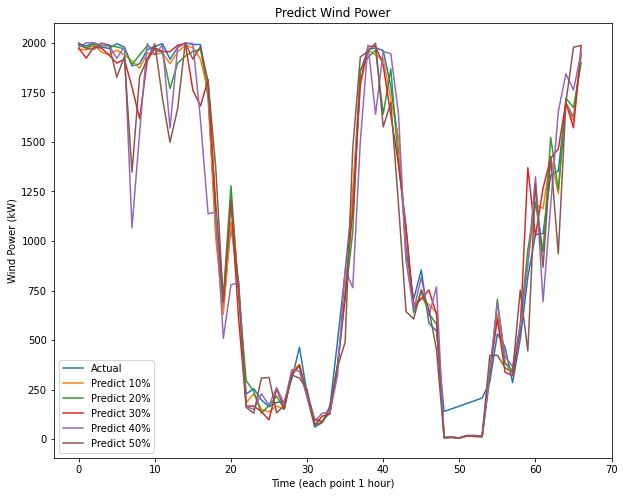

In [25]:
plt.figure(figsize = (10,8))
plt.plot(b_denor, label = 'Actual')
plt.plot(y_pred_denor_10, label = 'Predict 10%')
plt.plot(y_pred_denor_20, label = 'Predict 20%')
plt.plot(y_pred_denor_30, label = 'Predict 30%')
plt.plot(y_pred_denor_40, label = 'Predict 40%')
plt.plot(y_pred_denor_50, label = 'Predict 50%')
plt.xticks([0,10,20,30,40,50,60,70])
plt.xlabel('Time (each point 1 hour)')
plt.ylabel('Wind Power (kW)')
plt.title ('Predict Wind Power')
plt.legend()